In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/clean_df.csv")

In [3]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,0.830000,122.000000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,3.329981,3.259816,10.170100,103.365000,5118.259901,25.200000,8.041663,13205.690000,9.937914
std,57.879185,1.248557,32.076542,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,0.268562,0.314177,4.014163,37.455525,479.240743,6.432487,1.844764,7966.982558,2.539415
min,0.000000,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918
25%,49.750000,0.000000,100.250000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333
50%,99.500000,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5162.995050,24.000000,7.833333,10270.000000,9.791667
75%,149.250000,2.000000,138.250000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.750000,12.368421
max,199.000000,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923


In [4]:
drive_wheels_counts = pd.DataFrame(df["drive-wheels"].value_counts())
drive_wheels_counts.rename(columns={"drive-wheels": "value_counts"}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,74
4wd,8


<Axes: xlabel='drive-wheels', ylabel='price'>

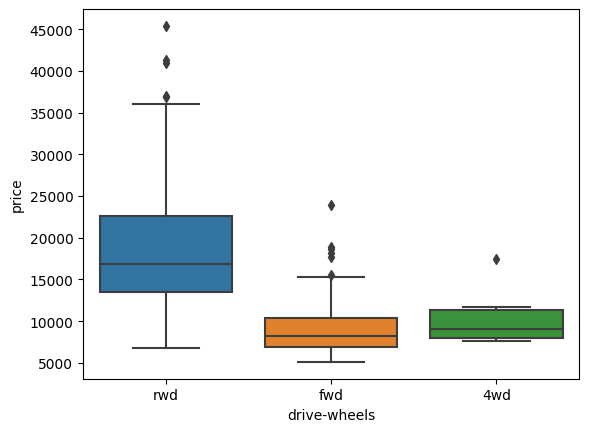

In [5]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Text(0, 0.5, 'Price')

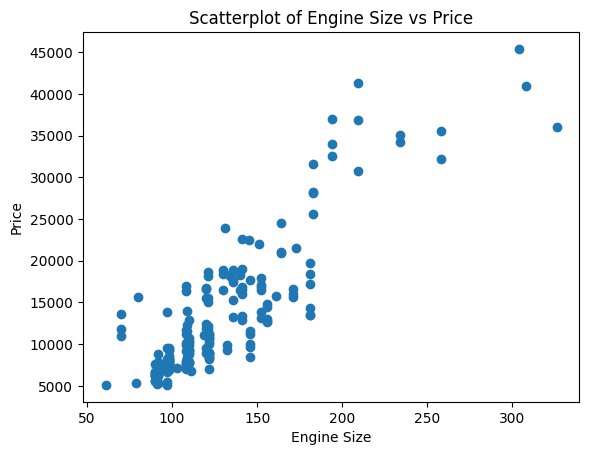

In [6]:
# scatter plot
# - each observation represented as a point
# - scatter  plot show the relationship between two variables
# 1. Predictor / independent variable on x-axis (size-engine)
# 2. Target / dependent variable on y-axis (price)
x = df["engine-size"]
y = df["price"]

plt.scatter(x, y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

In [7]:
# groupby
# can be applied on categorical variables
# group data into categories
# single or multiple variables

df_test = df[["drive-wheels", "body-style", "price"]]
df_grp = df_test.groupby(["drive-wheels", "body-style"], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [8]:
# better way to show the groupby results
df_pivot = df_grp.pivot(index="drive-wheels", columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

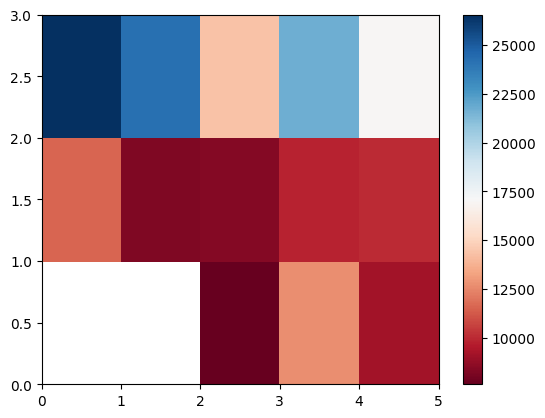

In [17]:
# heatmap
plt.pcolor(df_pivot, cmap="RdBu")
plt.colorbar()
plt.show()